#  BCB 546X: Python Assignment Details

## Your Mission: Complete Python code in a Jupyter Notebook

## Python Translate Script

# IMPORTANT:
    1) install BioPython so that this will work (see first block of optional code)
    2) if this script was downloaded individually rather than cloning the repository, make sure to download the  required input files as well ('bears_cytb.fasta' and 'bears_cytb.fasta') into the same directory

In [1]:
# installs BioPython in current Jupyter kernel
# adapted from https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# import sys
# !conda install --yes --prefix {sys.prefix} biopython

In [2]:
from Bio import SeqIO    # imports the Sequence Input/Output tool from Biopython
from Bio.Data import CodonTable    # imports a library of Codon Tables from NCBI that can be used when translating
import pandas as pd    # imports the pandas software and renaming it as 'pd' for when it is called

### FUNCTIONS ###

### 1: Collecting information
Dr. X: this gets sequences

Please finish documenting this function with comments, or in notebook markdown text.

Your descriptions of all functions should contain information about what the function does,
as well as information about the return types and arguments.

In [3]:
def get_sequences_from_file(fasta_fn):    # creating a function called 'get_sequences_from_file' requiring an argument called 'fasta_fn' for the input file
    sequence_data_dict = {}    # this creates an empty dictionary called 'sequence_data_dict'
    for record in SeqIO.parse(fasta_fn, "fasta"):    # starting a For Loop that will iterate through the input file treating it as a fasta file
        description = record.description.split()    # takes each entry in the fasta file and splits at the spaces and temporarliy assigns it as a list called 'description'
        species_name = description[1] + " " + description[2]    # creates the name of each species for the dictionary by taking the second and third items separated by a space and assigns it to 'species_name'
        sequence_data_dict[species_name] = record.seq    # fills the dictionary created above with the 'species_name' as the key and associated sequence as the value
    return(sequence_data_dict)    # returns the dictionary with the collection of species and sequences

In [4]:
# We are using the function defined in the previous step using 'bears_cytb.fasta' as the input
# and assigning the output to 'bears_dict'. Then we call 'bears_dict' to look at the contents
bears_dict = get_sequences_from_file(fasta_fn='bears_cytb.fasta')
bears_dict

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

### 2: YOUR STRING-TRANSLATE FUNCTION
Write a function that translates sequences.

All sequences start at codon position 1.

Complete a function that translates using a loop over the string of nucleotides.

In [5]:
def translate_function(string_nucleotides):    # creating a function called 'translate_function' requiring an argument called 'string_nucleotides' for the input file
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]    # assigns the "Vertebrate Mitochondrial" as 'mito_table' and will be used as the key to translate codons
    
    if type(string_nucleotides) == str:    # this ifelse statement is checking to make sure the input format is a string
        sequence = string_nucleotides    # if the input is a string we are going to assign the input to 'sequence'
    else:    # if the input format is NOT a string
        sequence = string_nucleotides    # then we change the format to a string and assign the modified input to 'sequence'
    
    start = sequence.find('ATG')    # Here were are searching for the start codon and defining the sequence to be translated as anthing that follows the start codon
    seq_start = sequence[start:]    # adapted from https://stackoverflow.com/questions/19521905/translation-dna-to-protein

    aa_seq_string = ''    # we create an empty string called 'aa_seq_string'
    for base in range(0,len(seq_start),3):    # start a For Loop that will iterate through every 3 bases of the sequence we defined above for the length of the sequence
        codon = seq_start[base:base+3]    # defines each group of 3 bases as a codon
        if codon in mito_table.stop_codons:    # this if statement checks the codon to see if it is a stop codon
            break    # if the codon is a stop codon then this command will break the loop
        aa = mito_table.forward_table[codon]    # if the codon passes the if statement then we use the translation table ('mito_table') to find the corresponding amino acid as assign it to 'aa'
        aa_seq_string += aa    # add the newly assigned amino acid to the string we defined above 'aa_seq_string'
    return(aa_seq_string)    # after the For Loop iterates through the entire sequence we return the newly built protein sequence

In [6]:
# testing the translation function, we create a random string of nucleotides
translate_function(string_nucleotides= 'ATGTATCTAGCAGTACGATACGGGATTAGG')

'MYLAVRYGI'

### 3: YOUR ALTERNATIVE FUNCTION
Is there a better way to write the translation function? (Hint: yes there is.) 
Perhaps using available BioPython library utilities?
Please also write this function.

In [7]:
# adapted from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25
from Bio.Seq import Seq    # imports the Seq tool from Biopython
from Bio.Alphabet import IUPAC    # imports the nucleotide and protein alphabets defined by IUPAC from Biopython

In [8]:
# creating a function called 'translate_nucleotides' requiring an argument called 'string_nucleotides' for the input file
def translate_nucleotides(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna)    # creates a Seq object, use the input 'string_nucleotides' as the sequence of the object with the IUPAC.unambiguous_dna as the associated alphabet and assign it to 'coding_dna'
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)    # translates the Seq object we created above using the .translate() function while specifying the translation table "Vertebrate Mitochondrial" and telling the function to stop translating once it hits a stop codon
    return(aa_seq_string)    # returns the translated sequence

In [9]:
# testing the new translation function given just a string of nucleotides, we use the same string of nucleotides from the test above
translate_nucleotides('ATGTATCTAGCAGTACGATACGGGATTAGG')

Seq('MYLAVRYGI', IUPACProtein())

In [10]:
# creating a function called 'translate_Seq' requiring an argument called 'Seq_object' for the input file
def translate_Seq(Seq_object):
    aa_seq_string = Seq_object.translate(table="Vertebrate Mitochondrial", to_stop=True)    # translates the input Seq object using the .translate() function while specifying the translation table "Vertebrate Mitochondrial" and telling the function to stop translating once it hits a stop codon
    return(aa_seq_string)    # returns the translated sequence

In [11]:
# testing the other new translation function given a Seq object as the input
translate_Seq(bears_dict['Helarctos malayanus'])

Seq('MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGVCLILQIMTGLFLAMH...SKW', ExtendedIUPACProtein())

### 4: YOUR COUNT AA ANALYSIS FUNCTION
Write a function that calculates the molecular weight of each amino acid sequence.

For this, you can use some BioPython functions. I think you can use the ProtParam module.

For more info, check this out: http://biopython.org/wiki/ProtParam

So you should import the following before defining your function:

In [12]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis    # imports the Protein Analysis from Biopython

In [13]:
# creating a function called 'compute_mw_Seq' requiring an argument called 'Seq_object' for the input file
def compute_mw_Seq(Seq_object):
    my_seq = translate_Seq(Seq_object)    # uses the 'translate_Seq' function created above to translate the input sequence and assigns the new string of amino acids to 'my_seq'
    analysed_seq = ProteinAnalysis(str(my_seq))    # uses the ProteinAnalysis function from Biopython which converts the input as a string 'my_seq' to a Seq object while validating it is a protein sequence and assigns the output to 'analysed_seq'
    molecular_weight = analysed_seq.molecular_weight()    # uses the .molecular_weight() function from Biopython to calculate the molecular weight of 'analysed_seq' from above and assigns it to 'molecular_weight'
    return molecular_weight    # returns the 'molecular_weight'

In [14]:
# testing the 'compute_mw_Seq' function to calculate molecular weight using a Seq object as the input
compute_mw_Seq(bears_dict['Helarctos malayanus'])

42560.89100000001

### 5: YOUR GC CONTENT ANALYSIS FUNCTION
Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [15]:
# http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC
from Bio.SeqUtils import GC    # imports the GC tool from Biopython

In [16]:
# creates a function called 'compute_GC_Seq' requiring an argument called 'Seq_object' for the input file
def compute_GC_Seq(Seq_object):
    GC_content = GC(Seq_object)    # uses the .GC() function to calculate the GC percentage of the nucleotide string from given in the Seq object and assigns the output to 'GC_content'
    return GC_content    # returns 'GC_content'

In [17]:
# testing the 'compute_GC_Seq' function to calculate the percentage of GC for the sequence of 'Helarctos malayanus' in the bears dictionary
compute_GC_Seq(bears_dict['Helarctos malayanus'])

44.29824561403509

##   MAIN

In [18]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")    # reads the 'bears_cytb' fasta file from the working directory and assigns it to 'cytb_seqs' as a dictionary
bears_df = pd.read_csv("bears_mass.csv")    # reads the 'bears_mass' csv file from the working directory and assigns it to 'bears_df' as a dataframe
species_list = list(bears_df.species)    # extracts the species names from the 'bears_df' dataframe and assigns it to 'species_list' as a list
bears_df    # prints the 'bears_df' dataframe

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


### 6: Adding columns
Add two new columns to the bears DataFrame: 

    (1) molecular weight
    (2) GC content.
    
Set the value to 'NaN' to indicate that these cells are currently empty.

In [19]:
import numpy as np    # imports the numpy software and renames it as 'np' for when it is called later

In [20]:
bears_df['molecular_weight'] = np.nan    # creates a column called 'molecular_weight' in the 'bears_df' dataframe and assigns NaN as values for the column
bears_df['GC_content'] = np.nan    # creates a column called 'GC_content' in the 'bears_df' dataframe and assigns NaN as values for the column
bears_df    # prints the 'bears_df' dataframe with the new columns of all NaN

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


### 7: Creating new DataFrames
Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [21]:
for key, value in bears_dict.items():    # starting a For Loop that will iterate through the 'bears_dict' dictionary
    bears_df.loc[bears_df.species == key, 'molecular_weight'] = compute_mw_Seq(value)    # uses the 'compute_mw_Seq' created above to translate and then calculate the molecular weight of each vaule (nucleotide sequence) in the dictionary and the fills in the output for the corresponding key in the 'bears_df' dataframe under the 'molecular_weight' column
    bears_df.loc[bears_df.species == key, 'GC_content'] = compute_GC_Seq(value)    # uses the 'compute_mw_Seq' created above to calculate the GC content of each vaule (nucleotide sequence) in the dictionary and the fills in the output for the corresponding key in the 'bears_df' dataframe under the 'GC_content' column
bears_df    # prints the 'bears_df' dataframe with filled in values for 'molecular_weight' and 'GC_content'

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


### 8: Plotting a bar-chart
Plot a bar-chart of the mass with the x-axes labeled with species names.

##### *Q1* What is the largest bear species? 

The largest bear species is *Ursus spelaeus*

##### *Q2* What else is interesting about this species?

This species of bear went extinct about 24,000 years ago and wasn't described until 1774.
#source: https://en.wikipedia.org/wiki/Cave_bear

In [22]:
import matplotlib.pyplot as plt    # imports the pyplot framework from the matplot library and renames it as 'plt' for when it is called later
import seaborn as sns    # imports the seaborn vizualization library and renames it as 'sns' for when it is called later

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

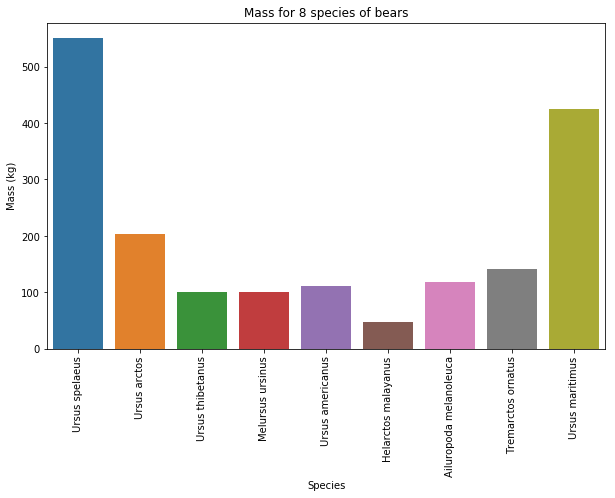

In [23]:
fig, ax = plt.subplots(figsize=(10,6))    # defines the size of the following figure
sns.barplot(data=bears_df, x='species', y='mass')    # uses the .barplot() function from seaborn to generate a barplot using the 'bears_df' dataframe  with the 'species' collumn on the x-axis and the 'mass' variable on the y-axis
ax.set(xlabel='Species', ylabel='Mass (kg)')    # renames the axes
plt.title("Mass for 8 species of bears")    # renames the title of the graph
plt.xticks(rotation=90)  # rotates the bar lables on the x-axis; adapted from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

### 9: Plotting a scatterplot
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

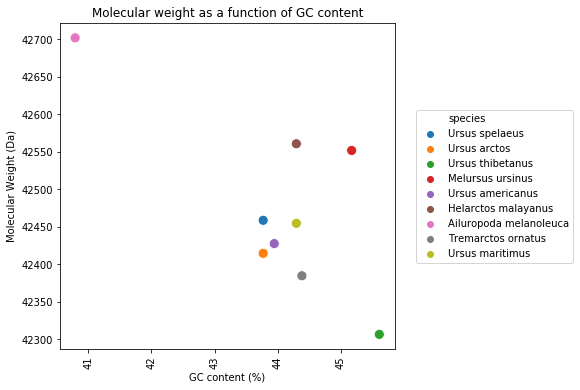

In [24]:
fig, ax = plt.subplots(figsize=(6,6))    # defines the size of the following figure
sns.scatterplot(data=bears_df, x='GC_content', y='molecular_weight', s=100, hue='species')    # uses the .barplot() function from seaborn to generate a barplot using the 'bears_df' dataframe  with the 'GC_contents' column plotted on the x-axis and the 'molecular_weight' column plotted on the y-axis; also changes the size of the points on the graph and uses the 'species' column to assign colors to the points
ax.set(xlabel='GC content (%)', ylabel='Molecular Weight (Da)')    # renames the axes
plt.title("Molecular weight as a function of GC content")    # renames the title of the graph
plt.xticks(rotation=90)    # rotates the bar lables on the x-axis; adapted from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.legend(bbox_to_anchor=(1.05, 0.75), loc=2)  # moves the legend outside of the graph to a specifed location; adapted from https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 10: Saving new files
Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [25]:
bears_df.to_csv('bears_df.csv')    # saves the 'bears_df' dataframe to a csv in the working directory called 'bears_df.csv' 

### 11 - BONUS
What else can we do with this dataset in Python? 
Add functions or anything that might be interesting and fun. (optional)

I chose to plot all three columns of data in a single 3D graph. These graphs can be useful when creating clusters because the additional variable helps create another opportunity for separation. Even in this instance with a small data set we can see one of the points from the cluster of 5 species in the 2D graph is removed from the cluster in the 3D graph.

In [26]:
from mpl_toolkits.mplot3d import Axes3D    #imports the mplot3d toolkit from matplot to allow for 3D plotting

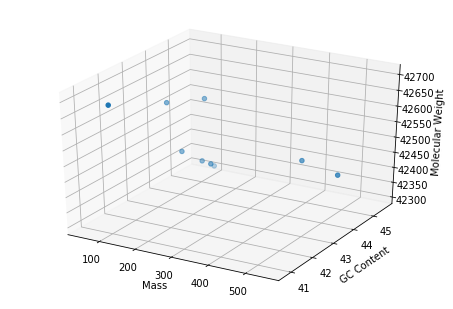

In [27]:
fig = plt.figure()    # defines a new figure using the .figure() option
ax = Axes3D(fig)    # uses the Axes3D to generate a 3D figure and assigns it to 'ax'

z =list(bears_df['molecular_weight'])    # creates a list from the 'molecular_weight' column in the 'bears_df' dataframe and assigns it to 'z'
y =list(bears_df['GC_content'])    # creates a list from the 'GC_content' column in the 'bears_df' dataframe and assigns it to 'y'
x =list(bears_df['mass'])    # creates a list from the 'mass' column in the 'bears_df' dataframe and assigns it to 'x'

ax.scatter(x, y, z)    # creates a 3D scatter plot using the 3 objects defined above for the respective axes

ax.set_xlabel('Mass')    # renames the x-axis
ax.set_ylabel('GC Content')    # renames the y-axis
ax.set_zlabel('Molecular Weight')    # renames the z-axis

plt.show()    # prints the graph